<a href="https://colab.research.google.com/github/Mineth03/Client-Predicting/blob/Model_Random_Forest/Models/RandomForestModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

In [ ]:
data = pd.read_csv("BankDataset.csv")

In [ ]:
X = data.drop(columns=["y"])
y = data["y"]

In [ ]:
# Data splitting
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Apply SMOTE
smote = SMOTE(
    random_state=42,
    k_neighbors=3,
    sampling_strategy=0.6
)
XTrain, yTrain = smote.fit_resample(XTrain, yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
# Initialize the RF model
RF = RandomForestClassifier(
    random_state=42,
    n_estimators=200,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='log2',
    class_weight='balanced',
    max_depth=50
)

In [ ]:
# Train the model
RF.fit(XTrain, yTrain)

RandomForestClassifier(class_weight='balanced', max_depth=50,
                       max_features='log2', min_samples_leaf=5,
                       min_samples_split=10, n_estimators=200, random_state=42)

In [ ]:
scores = cross_val_score(RF, XTrain, yTrain, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.79634381 0.88805731 0.88934032 0.89436544 0.89254785]
Mean cross-validation score: 0.8721309452836495


In [ ]:
# Predictions for training and testing sets
trainPred = RF.predict(XTrain)
testPred = RF.predict(XTest)

In [ ]:
# Calculate accuracies
trainAcc = accuracy_score(yTrain, trainPred)
testAcc = accuracy_score(yTest, testPred)

In [ ]:
print(f"Training Set Accuracy: {trainAcc:.4f}")
print(f"Testing Set Accuracy: {testAcc:.4f}")

Training Set Accuracy: 0.9040
Testing Set Accuracy: 0.8731


In [ ]:
# Classification report
classReport = classification_report(yTest, testPred)

In [ ]:
print("\nClassification Report:\n", classReport)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      7308
           1       0.45      0.59      0.51       928

    accuracy                           0.87      8236
   macro avg       0.70      0.75      0.72      8236
weighted avg       0.89      0.87      0.88      8236



In [ ]:
# ROC-AUC Score
print("ROC-AUC Score:", roc_auc_score(yTest, RF.predict_proba(XTest)[:, 1]), "\n")

ROC-AUC Score: 0.8013132602674442 



In [ ]:
# Confusion matrix
cm = confusion_matrix(yTest, testPred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])

<Figure size 800x600 with 0 Axes>

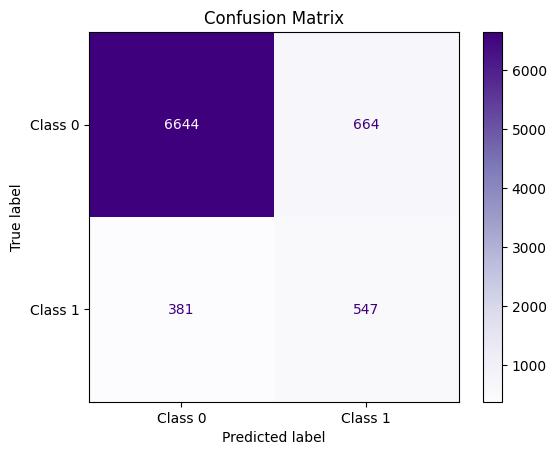

In [ ]:
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix")
plt.show()